Tech Project 2 - Ensemble Methods

Diogo Pessoa


In [11]:
import pandas as pd

In [12]:
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [13]:
# combined_data.info()

In [14]:
# combined_data.head(25)

## Scaling Dataset features

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [18]:
print('check_data_split',[x_train_sc.shape,x_test_sc.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


In [21]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154567 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   comments_disabled               154567 non-null  bool   
 1   ratings_disabled                154567 non-null  bool   
 2   video_error_or_removed          154567 non-null  bool   
 3   likes_log                       154567 non-null  float64
 4   label                           154567 non-null  float64
 5   dislikes_log                    154567 non-null  float64
 6   comment_log                     154567 non-null  float64
 7   num_tags                        154567 non-null  int64  
 8   desc_len                        154567 non-null  int64  
 9   len_title                       154567 non-null  int64  
 10  country_CA                      154567 non-null  bool   
 11  country_FR                      154567 non-null  bool   
 12  countr

ValueError: x and y must be the same size

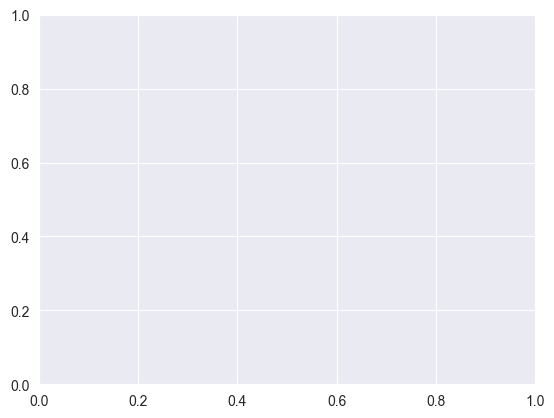

In [20]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train, y_train)

# Predict
y_1 = regr_1.predict(x_test)

# Plot the results
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Voting Regressor to compare different models

* [skelarn Voting Regressor](https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
* 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

n_estimators=140 
# Training classifiers
grad_boosting_regressor = GradientBoostingRegressor(random_state=42, n_estimators=n_estimators)
ada_boosting_regressor = AdaBoostRegressor(random_state=42, n_estimators=n_estimators)
random_forest_regressor = RandomForestRegressor(random_state=42, n_estimators=n_estimators)
bagging_regressor = BaggingRegressor(random_state=1, n_estimators=n_estimators)
linear_regr = LinearRegression()
voting_reg = VotingRegressor(estimators=[('gb', grad_boosting_regressor), ('rf', random_forest_regressor), ('lr', linear_regr), ('ada_b', ada_boosting_regressor), ('bagging_r', bagging_regressor)]) 

In [ ]:
# Traing models - GradientBoostingRegressor, RandomForestRegressor, LinearRegression, AdaBoostRegressor, BaggingRegressor, VotingRegressor
grad_boosting_regressor.fit(x_train_Trans, y_train)
ada_boosting_regressor.fit(x_train_Trans, y_train)
bagging_regressor.fit(x_train_Trans, y_train)
random_forest_regressor.fit(x_train_Trans, y_train)
linear_regr.fit(x_train_Trans, y_train)
voting_reg.fit(x_train_Trans, y_train)

In [ ]:
gdb_prediction = grad_boosting_regressor.predict(x_test_Trans)
rf_prediction = random_forest_regressor.predict(x_test_Trans)
lg_prediction = linear_regr.predict(x_test_Trans)
ada_b_prediction = ada_boosting_regressor.predict(x_test_Trans)
bagging_r_prediction = bagging_regressor.predict(x_test_Trans)
voting_reg_prediction = voting_reg.predict(x_test_Trans)